apply KNN to predict that whether the LowBirthWeight is the Low or Normal

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split  

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
# import some data to play with
data = pd.read_csv("dataset/1_birthweight_reduced.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
id                  42 non-null int64
headcirumference    42 non-null int64
length              42 non-null int64
Birthweight         42 non-null float64
Gestation           42 non-null int64
smoker              42 non-null int64
motherage           42 non-null int64
mnocig              42 non-null int64
mheight             42 non-null int64
mppwt               42 non-null int64
fage                42 non-null int64
fedyrs              42 non-null int64
fnocig              42 non-null int64
fheight             42 non-null int64
lowbwt              42 non-null int64
mage35              42 non-null int64
LowBirthWeight      42 non-null object
dtypes: float64(1), int64(15), object(1)
memory usage: 5.7+ KB


In [26]:
data.head(10)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
5,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal
6,1363,12,19,5.2,37,1,20,7,64,104,20,10,35,73,1,0,Low
7,575,12,19,6.1,37,1,19,7,65,132,20,14,0,72,0,0,Normal
8,822,13,19,7.5,38,0,20,0,62,103,22,14,0,70,0,0,Normal
9,1081,14,21,8.0,38,0,18,0,67,109,20,12,7,67,0,0,Normal


In [27]:
data['LowBirthWeight'] = data['LowBirthWeight'].map({'Low': 1, 
                                                     'Normal': 2 })
data.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,1
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,1
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,2
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,1
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,1


In [28]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'
    return color

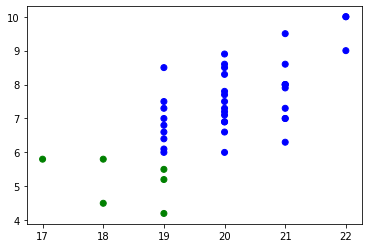

In [29]:
length = data.length.values
Birthweight = data.Birthweight.values
types = data.LowBirthWeight.values
color= [make_color(x) for x in types]
plt.scatter(length, Birthweight, color=color)
plt.show()

In [30]:
X = data.drop(['id', 'LowBirthWeight'], axis=1)
y = data.LowBirthWeight

In [31]:
X.head()

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0
1,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0
2,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0
3,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1
4,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0


In [32]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: LowBirthWeight, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

list_k = []
list_acc = []
for K_value in range(2, 6):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    
position = list_acc.index(max(list_acc))
k = list_k[position]

print("\nThe optimal number of neighbors is %d with %0.1f%%" % (k, list_acc[vi_tri]))

Accuracy is  69.23076923076923 % for K-Value: 2
Accuracy is  76.92307692307693 % for K-Value: 3
Accuracy is  76.92307692307693 % for K-Value: 4
Accuracy is  76.92307692307693 % for K-Value: 5

The optimal number of neighbors is 3 with 76.9%


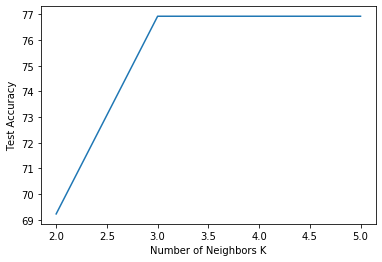

In [42]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
print("The prediction accuracy is: ", knn.score(X_test,y_test)*100,"%")

The prediction accuracy is:  76.92307692307693 %


In [46]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,1,1
1,2,2
2,2,1
3,2,1
4,1,2


In [47]:
x_now = [[11,19,8,41,0,21,0,61,115,25,14,25,72,0,0]]
y_now = knn.predict(x_now)
y_now

array([2])

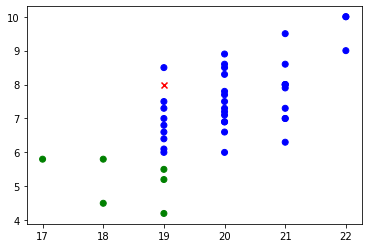

In [48]:
length = data.length.values
Birthweight = data.Birthweight.values
types = data.LowBirthWeight.values
color= [make_color(x) for x in types]
plt.scatter(length, Birthweight, color=color)
plt.scatter(x_now[0][1], x_now[0][2], color='red', marker = 'x')
plt.show()